In [2]:
include("Main_module.jl")
using .TDQMC
using PyPlot, Distributions, Random

In [3]:
P = Parameter{Float64,Int64}()
Dy = Dynamics{Float64}();

In [4]:
Dy.Trajectory      #系综500,电子数为1

1×500 Matrix{Float64}:
 -0.105875  0.797215  -1.21028  3.68549  …  1.01199  0.789616  -0.460616

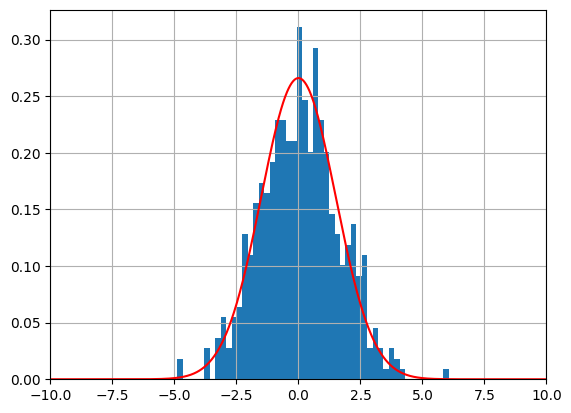

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


(-10.0, 10.0)

In [4]:
hist(Dy.Trajectory', 50, density = true);
plot(P.sampling, pdf(Normal(0, 1.5), P.sampling), color = "red")
grid()
xlim(-10, 10)

In [4]:
parallel_CTE!(P, Dy)

[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 2, 1, 1]
[1, 2, 1, 2]
[2, 2, 1, 2]
[2, 2, 2, 2]
[3, 2, 2, 2]
[3, 2, 2, 3]
[3, 3, 2, 3]
[3, 3, 3, 3]
[3, 3, 3, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 5]
[5, 4, 4, 5]
[5, 5, 4, 5]
[5, 5, 5, 5]
[5, 5, 5, 6]
[6, 5, 5, 6]
[6, 5, 6, 6]
[6, 6, 6, 6]
[6, 6, 6, 7]
[7, 6, 6, 7]
[7, 6, 7, 7]
[7, 7, 7, 7]
[7, 7, 7, 8]
[8, 7, 7, 8]
[8, 7, 8, 8]
[8, 8, 8, 8]
[8, 8, 8, 9]
[8, 8, 9, 9]
[9, 8, 9, 9]
[9, 9, 9, 9]
[9, 9, 9, 10]
[10, 9, 10, 10]
[10, 9, 10, 10]
[10, 10, 10, 10]
[10, 10, 10, 11]
[11, 10, 10, 11]
[11, 11, 11, 11]
[11, 11, 11, 11]
[11, 11, 11, 12]
[12, 11, 11, 12]
[12, 12, 11, 12]
[12, 12, 12, 12]
[12, 12, 12, 13]
[13, 12, 12, 13]
[13, 13, 12, 13]
[13, 13, 13, 13]
[13, 13, 13, 14]
[14, 13, 13, 14]
[14, 14, 13, 14]
[14, 14, 14, 14]
[14, 14, 14, 15]
[15, 14, 14, 15]
[15, 15, 14, 15]
[15, 15, 15, 15]
[15, 15, 15, 16]
[16, 15, 15, 16]
[16, 16, 15, 16]
[16, 16, 16, 16]
[16, 16, 16, 17]
[17, 16, 16, 17]
[17, 17, 16, 17]
[17, 17, 1

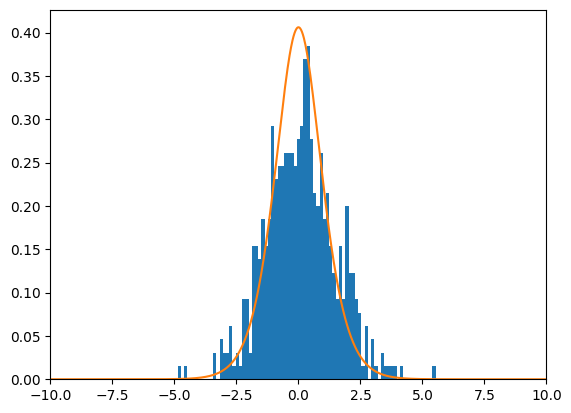

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [5]:
hist(Dy.Trajectory',80, density = true)
plot(P.sampling, abs2.(Dy.Guide_Wave[1]))
xlim(-10,10)
show()

In [10]:
println(fit(Normal, Dy.Trajectory'))    #拟合粒子的分布

Normal{Float64}(μ=0.07991297892797412, σ=1.4121482737346074)


In [10]:
using LsqFit        #最小二乘非线性拟合
model(x, p) = 1 / (sqrt(2 * pi) * p[2]) * @. exp(-(x - p[1])^2 / (2 * p[2]^2))
ydata = abs2.(Dy.Guide_Wave[1])
p0 = [0.0, 2.0]
#ydata = model(P.sampling, p0)
fit0 = LsqFit.curve_fit(model, P.sampling, ydata, p0)
fit0.param

2-element Vector{Float64}:
 5.596734849580868e-13
 1.0038042441411146

In [11]:
sum(Dy.Energy)/length(Dy.Energy)                 #计算平均能量

-0.6697809450906438

# 对比TDSE和TDQMC得到的基态波函数

In [6]:
using DataFrames, CSV

In [8]:
df = CSV.read("Ground_Wave_Func.csv", DataFrame)
df.wave = @. abs(parse(Complex{Float64}, df.wave))

20001-element Vector{Float64}:
 1.1208304912458287e-15
 1.1367143951546517e-15
 1.1205113177892101e-15
 1.1013859612749383e-15
 1.1089316128421773e-15
 1.0995939085323167e-15
 1.0812377554581884e-15
 1.1060682220461417e-15
 1.0956104221187703e-15
 1.0867108341304914e-15
 1.0828727359932418e-15
 1.0847177137693729e-15
 1.0756448639098743e-15
 ⋮
 1.2113130648594924e-15
 1.1956873740118553e-15
 1.1787224482599777e-15
 1.1780410297091591e-15
 1.1904062490433133e-15
 1.186874263187747e-15
 1.1785519108906926e-15
 1.167680376399767e-15
 1.1657878194378023e-15
 1.1494316044773072e-15
 1.1371993048705045e-15
 1.1380225527311601e-15

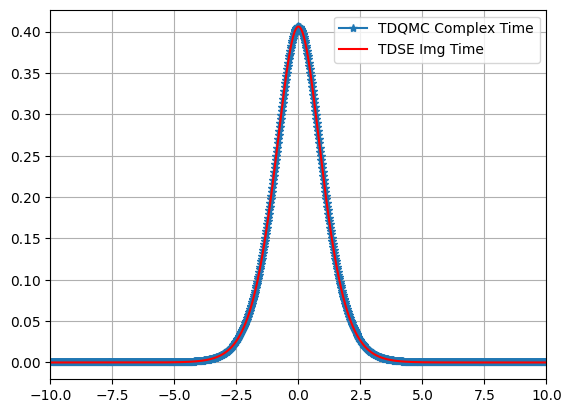

In [9]:
plot(P.sampling, abs2.(Dy.Guide_Wave[1]), marker="*", label = "TDQMC Complex Time")
plot(df.x, abs2.(df.wave), color = "red", label = "TDSE Img Time")
legend()
xlim(-10, 10)
grid()

# 用TDQMC得到基态过程中轨迹随时间的变化

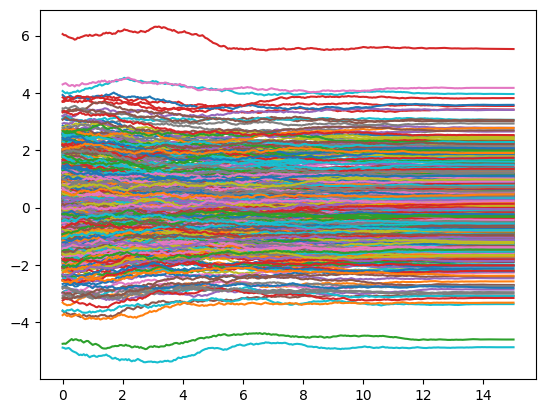

500-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D55B0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D5610>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D5730>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D5850>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D5970>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079C4490>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079C44C0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D5BB0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D5CD0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D5DF0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D5F10>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079D55E0>
 PyObject <matplotlib.lines.Line2D object at 0x00000000079DC160>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x000000008C4321C0>
 PyObject <matplotlib.lines.Line2D object at 0x000

In [10]:
plot(real(P.Δt).* (0:P.step_t), Dy.Displace[:, :, 1])

# 对比舍选法得到的基态的能量

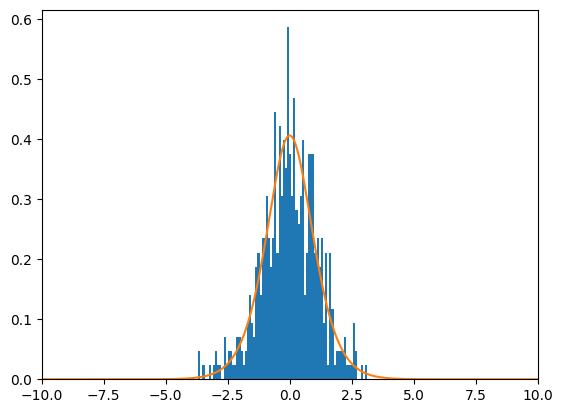

(-10.0, 10.0)

In [11]:
Vector_ch = choose(500, x = P.sampling, y = abs2.(Dy.Guide_Wave[1]))
hist(Vector_ch, 80, density = true)
plot(P.sampling, abs2.(Dy.Guide_Wave[1]))
xlim(-10, 10)

In [12]:
Dy.Trajectory[:] = Vector_ch

for i in 1:P.Group
    Dy.Energy[i] = Group_Energy(P, Dy, i)
end

sum(Dy.Energy) / length(Dy.Energy)   

-0.669778147485088